<a href="https://colab.research.google.com/github/Arham-12336/Final_evaluation/blob/main/Mid_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing libraries**

In [1]:
import pandas as pd
import pickle
import networkx as nx
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from pandas.core.common import random_state
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from node2vec import Node2Vec
from sklearn.metrics import plot_confusion_matrix


Connecting to google drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Excessing dataset through GDrive

In [4]:
import os
os.chdir('/content/drive/MyDrive/Crossref Data/Experiments/IND2')

# Reading Pickle file

In [5]:
df1= pd.read_pickle("1985COCIFull2015.pkl")
df2 = pd.read_pickle("1985metadata2015.pkl")

In [6]:
df1

,citing,cited
1906,10.1002/1097-0142(20010915)92:6<1468::aid-cncr...,10.1016/s0140-6736(86)90837-8
36730,10.1002/1097-0258(20000915/30)19:17/18<2479::a...,10.1068/a280099
38457,10.1002/1097-0266(200007)21:7<723::aid-smj114>...,10.1002/smj.4250130702
38511,10.1002/1097-0266(200007)21:7<775::aid-smj111>...,10.1287/orsc.7.4.375
38519,10.1002/1097-0266(200007)21:7<775::aid-smj111>...,10.1002/smj.4250171105
...,...,...
185198,10.1016/j.tra.2014.03.014,10.1126/science.162.3859.1243
185436,10.1016/j.tra.2014.07.001,10.1287/mnsc.35.8.982
185530,10.1016/j.tra.2014.08.007,10.2307/249008
186228,10.1016/j.tra.2015.04.005,10.2307/1242453


Data frame 1 have 552183 has nodes

In [7]:
df2

,Title,Venue,Year,Author
DOI,,,,
10.1001/jamafacial.2014.21,Lasers and Losers in the Eyes of the Law,JAMA Facial Plastic Surgery,2014,Peter Svider
10.1001/jamafacial.2014.21,Lasers and Losers in the Eyes of the Law,JAMA Facial Plastic Surgery,2014,Michael Carron
10.1001/jamafacial.2014.21,Lasers and Losers in the Eyes of the Law,JAMA Facial Plastic Surgery,2014,Giancarlo Zuliani
10.1001/jamafacial.2014.21,Lasers and Losers in the Eyes of the Law,JAMA Facial Plastic Surgery,2014,Jean Eloy
10.1001/jamafacial.2014.21,Lasers and Losers in the Eyes of the Law,JAMA Facial Plastic Surgery,2014,Michael Setzen
...,...,...,...,...
10.7906/indecs.11.2.5,Distribution of Citations in one Volume of a J...,Interdisciplinary Description of Complex Systems,2013,Josip Stepanic
10.7906/indecs.11.2.5,Distribution of Citations in one Volume of a J...,Interdisciplinary Description of Complex Systems,2013,Antonio Protic
10.9745/ghsp-d-15-00034,The Astronomy of Africa’s Health Systems Liter...,Global Health: Science and Practice,2015,James Phillips


Data frame 2 have 17581 nodes

In [8]:
df2 = df2.drop(columns=['Year','Title'], axis=1)
df2

,Venue,Author
DOI,,
10.1001/jamafacial.2014.21,JAMA Facial Plastic Surgery,Peter Svider
10.1001/jamafacial.2014.21,JAMA Facial Plastic Surgery,Michael Carron
10.1001/jamafacial.2014.21,JAMA Facial Plastic Surgery,Giancarlo Zuliani
10.1001/jamafacial.2014.21,JAMA Facial Plastic Surgery,Jean Eloy
10.1001/jamafacial.2014.21,JAMA Facial Plastic Surgery,Michael Setzen
...,...,...
10.7906/indecs.11.2.5,Interdisciplinary Description of Complex Systems,Josip Stepanic
10.7906/indecs.11.2.5,Interdisciplinary Description of Complex Systems,Antonio Protic
10.9745/ghsp-d-15-00034,Global Health: Science and Practice,James Phillips


In [9]:
df1 = df1.set_index('cited')

### Joining two dataframe


In [10]:
df1= df1.merge(df2, left_on='citing', right_index=True)
df1 = df1.merge(df2, left_on='cited', right_index=True, suffixes=('_citing', '_cited'), how='inner')

Duplicated function is used to reduce the redundancy in the data

In [11]:
df1 = df1[~df1.index.duplicated(keep='first')]

In [12]:
df1

,citing,Venue_citing,Author_citing,Venue_cited,Author_cited
cited,,,,,
10.1140/epjst/e2012-01697-8,10.1007/978-3-658-01164-2_2,Handbuch Modellbildung und Simulation in den S...,Nicole Saam,The European Physical Journal Special Topics,D. Helbing
10.1016/j.joi.2010.06.004,10.3986/ags52109,Acta geographica Slovenica,Maruša Nučič,Journal of Informetrics,Joann Keyton
10.1007/s11573-012-0617-5,10.1007/978-3-658-03348-4_1,Performance Management im Hochschulbereich,Alexander Dilger,Zeitschrift für Betriebswirtschaft,Alexander Dilger
10.5465/amp.2011.0088,10.1007/978-3-658-03348-4_2,Performance Management im Hochschulbereich,Stefanie Ringelhan,Academy of Management Perspectives,Herman Aguinis
10.1016/j.joi.2009.04.001,10.1007/978-3-658-03348-4_4,Performance Management im Hochschulbereich,Matthias Meyer,Journal of Informetrics,S. Alonso
...,...,...,...,...,...
10.1108/jbim-02-2014-0027,10.1016/j.indmarman.2015.05.035,Industrial Marketing Management,Bernard Cova,Journal of Business & Industrial Marketing,Francisco Vieira
10.1142/s2010495214500055,10.1016/j.insmatheco.2015.01.002,Insurance: Mathematics and Economics,Elias Shiu,Annals of Financial Economics,CHIA-LIN CHANG
10.1140/epjds/s13688-014-0011-3,10.1016/j.physa.2015.05.062,Physica A: Statistical Mechanics and its Appli...,Gregorio D’Agostino,EPJ Data Science,Christian Schulz


**After reducing the redundency  we get 1743 nodes**

In [13]:
df_1=pd.read_pickle("1985COCIFull2015.pkl")

We use networkx library to buil a graph on citing cited and then find centralities

In [14]:
A_CC = nx.from_pandas_edgelist(df_1, 'citing','cited')
A_CC = pd.DataFrame(dict(
    A_D = dict(A_CC.degree),
    A_D_C = nx.degree_centrality(A_CC),
    A_EV = nx.eigenvector_centrality(A_CC,tol=1e-03),))

In [15]:
A_CC_Rank = A_CC.copy()
A_CC_Rank

,A_D,A_D_C,A_EV
10.1002/1097-0142(20010915)92:6<1468::aid-cncr1471>3.0.co;2-s,1,0.000003,0.000050
10.1016/s0140-6736(86)90837-8,21488,0.062088,0.536636
10.1002/1097-0258(20000915/30)19:17/18<2479::aid-sim583>3.0.co;2-0,1,0.000003,0.000050
10.1068/a280099,34,0.000098,0.000874
10.1002/1097-0266(200007)21:7<723::aid-smj114>3.0.co;2-h,1,0.000003,0.000050
...,...,...,...
10.1016/j.tra.2013.07.015,1,0.000003,0.000050
10.1016/j.tra.2013.12.010,1,0.000003,0.000050
10.1016/j.tra.2014.03.014,1,0.000003,0.000050
10.1016/j.tra.2014.07.001,1,0.000003,0.000050


We then rank them 

In [16]:
for methods in ['average', 'min', 'max', 'dense']:
    A_CC_Rank[f'A_D_{methods}_rank'] = A_CC_Rank['A_D_C'].rank(axis=0, method = methods,pct=True)
    A_CC_Rank[f'A_D_C{methods}_rank'] = A_CC_Rank['A_D'].rank(axis=0, method = methods,pct=True)
    A_CC_Rank[f'A_EV_{methods}_rank'] = A_CC_Rank['A_EV'].rank(axis=0, method = methods,pct=True)

In [17]:
A_CC_Rank

,A_D,A_D_C,A_EV,A_D_average_rank,A_D_Caverage_rank,A_EV_average_rank,A_D_min_rank,A_D_Cmin_rank,A_EV_min_rank,A_D_max_rank,A_D_Cmax_rank,A_EV_max_rank,A_D_dense_rank,A_D_Cdense_rank,A_EV_dense_rank
10.1002/1097-0142(20010915)92:6<1468::aid-cncr1471>3.0.co;2-s,1,0.000003,0.000050,0.373098,0.373098,0.373098,0.000003,0.000003,0.000003,0.746194,0.746194,0.746194,0.002028,0.002028,0.002024
10.1016/s0140-6736(86)90837-8,21488,0.062088,0.536636,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
10.1002/1097-0258(20000915/30)19:17/18<2479::aid-sim583>3.0.co;2-0,1,0.000003,0.000050,0.373098,0.373098,0.373098,0.000003,0.000003,0.000003,0.746194,0.746194,0.746194,0.002028,0.002028,0.002024
10.1068/a280099,34,0.000098,0.000874,0.992672,0.992672,0.992672,0.992589,0.992589,0.992589,0.992756,0.992756,0.992756,0.068966,0.068966,0.068826
10.1002/1097-0266(200007)21:7<723::aid-smj114>3.0.co;2-h,1,0.000003,0.000050,0.373098,0.373098,0.373098,0.000003,0.000003,0.000003,0.746194,0.746194,0.746194,0.002028,0.002028,0.002024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10.1016/j.tra.2013.07.015,1,0.000003,0.000050,0.373098,0.373098,0.373098,0.000003,0.000003,0.000003,0.746194,0.746194,0.746194,0.002028,0.002028,0.002024
10.1016/j.tra.2013.12.010,1,0.000003,0.000050,0.373098,0.373098,0.373098,0.000003,0.000003,0.000003,0.746194,0.746194,0.746194,0.002028,0.002028,0.002024
10.1016/j.tra.2014.03.014,1,0.000003,0.000050,0.373098,0.373098,0.373098,0.000003,0.000003,0.000003,0.746194,0.746194,0.746194,0.002028,0.002028,0.002024
10.1016/j.tra.2014.07.001,1,0.000003,0.000050,0.373098,0.373098,0.373098,0.000003,0.000003,0.000003,0.746194,0.746194,0.746194,0.002028,0.002028,0.002024


Join the ranking with the dataframe

In [18]:
Feature_DF = pd.merge(df1, A_CC_Rank, left_on='cited', right_index=True, how='inner')
Feature_DF

,citing,Venue_citing,Author_citing,Venue_cited,Author_cited,A_D,A_D_C,A_EV,A_D_average_rank,A_D_Caverage_rank,A_EV_average_rank,A_D_min_rank,A_D_Cmin_rank,A_EV_min_rank,A_D_max_rank,A_D_Cmax_rank,A_EV_max_rank,A_D_dense_rank,A_D_Cdense_rank,A_EV_dense_rank
cited,,,,,,,,,,,,,,,,,,,,
10.1140/epjst/e2012-01697-8,10.1007/978-3-658-01164-2_2,Handbuch Modellbildung und Simulation in den S...,Nicole Saam,The European Physical Journal Special Topics,D. Helbing,128,0.000370,0.003221,0.998437,0.998437,0.998437,0.998428,0.998428,0.998428,0.998445,0.998445,0.998445,0.259635,0.259635,0.259109
10.1016/j.joi.2010.06.004,10.3986/ags52109,Acta geographica Slovenica,Maruša Nučič,Journal of Informetrics,Joann Keyton,173,0.000500,0.004345,0.998815,0.998815,0.998815,0.998812,0.998812,0.998812,0.998818,0.998818,0.998818,0.346856,0.346856,0.346154
10.1007/s11573-012-0617-5,10.1007/978-3-658-03348-4_1,Performance Management im Hochschulbereich,Alexander Dilger,Zeitschrift für Betriebswirtschaft,Alexander Dilger,33,0.000095,0.000849,0.992486,0.992486,0.992486,0.992386,0.992386,0.992386,0.992586,0.992586,0.992586,0.066937,0.066937,0.066802
10.5465/amp.2011.0088,10.1007/978-3-658-03348-4_2,Performance Management im Hochschulbereich,Stefanie Ringelhan,Academy of Management Perspectives,Herman Aguinis,67,0.000194,0.001698,0.996679,0.996679,0.996679,0.996637,0.996637,0.996637,0.996721,0.996721,0.996721,0.135903,0.135903,0.135628
10.1016/j.joi.2009.04.001,10.1007/978-3-658-03348-4_4,Performance Management im Hochschulbereich,Matthias Meyer,Journal of Informetrics,S. Alonso,269,0.000777,0.006743,0.999174,0.999174,0.999174,0.999174,0.999174,0.999174,0.999174,0.999174,0.999174,0.480730,0.480730,0.479757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10.1108/jbim-02-2014-0027,10.1016/j.indmarman.2015.05.035,Industrial Marketing Management,Bernard Cova,Journal of Business & Industrial Marketing,Francisco Vieira,49,0.000142,0.001249,0.995050,0.995050,0.995050,0.994978,0.994978,0.994978,0.995123,0.995123,0.995123,0.099391,0.099391,0.099190
10.1142/s2010495214500055,10.1016/j.insmatheco.2015.01.002,Insurance: Mathematics and Economics,Elias Shiu,Annals of Financial Economics,CHIA-LIN CHANG,17,0.000049,0.000450,0.987734,0.987734,0.987734,0.987498,0.987498,0.987498,0.987971,0.987971,0.987971,0.034483,0.034483,0.034413
10.1140/epjds/s13688-014-0011-3,10.1016/j.physa.2015.05.062,Physica A: Statistical Mechanics and its Appli...,Gregorio D’Agostino,EPJ Data Science,Christian Schulz,22,0.000064,0.000574,0.989640,0.989640,0.989641,0.989494,0.989494,0.989494,0.989786,0.989786,0.989789,0.044625,0.044625,0.044534


References that we need to check in our dataset

In [19]:
data= pd.read_pickle("DOItest.pkl")
datadf = {"DOI": data}
DOItest = pd.DataFrame(datadf)
len(DOItest)
DOItest

,DOI
0,10.1016/j.joi.2011.11.005
1,10.1016/j.joi.2012.11.003
2,10.1023/b:scie.0000018529.58334.eb
3,10.1007/s11192-012-0729-2
4,10.1371/journal.pone.0059814
...,...
312,10.1016/j.joi.2015.08.001
313,10.1080/09737766.2007.10700824
314,10.1002/asi.21374
315,10.1016/j.joi.2011.06.007


# Annotations
we have used lamba function for filtering the data

In [20]:
DOItest_set = set(DOItest['DOI'])
Feature_DF['check'] = Feature_DF.apply(lambda row: row.name in DOItest_set, axis=1)
Feature_DF

,citing,Venue_citing,Author_citing,Venue_cited,Author_cited,A_D,A_D_C,A_EV,A_D_average_rank,A_D_Caverage_rank,...,A_D_min_rank,A_D_Cmin_rank,A_EV_min_rank,A_D_max_rank,A_D_Cmax_rank,A_EV_max_rank,A_D_dense_rank,A_D_Cdense_rank,A_EV_dense_rank,check
cited,,,,,,,,,,,,,,,,,,,,,
10.1140/epjst/e2012-01697-8,10.1007/978-3-658-01164-2_2,Handbuch Modellbildung und Simulation in den S...,Nicole Saam,The European Physical Journal Special Topics,D. Helbing,128,0.000370,0.003221,0.998437,0.998437,...,0.998428,0.998428,0.998428,0.998445,0.998445,0.998445,0.259635,0.259635,0.259109,False
10.1016/j.joi.2010.06.004,10.3986/ags52109,Acta geographica Slovenica,Maruša Nučič,Journal of Informetrics,Joann Keyton,173,0.000500,0.004345,0.998815,0.998815,...,0.998812,0.998812,0.998812,0.998818,0.998818,0.998818,0.346856,0.346856,0.346154,False
10.1007/s11573-012-0617-5,10.1007/978-3-658-03348-4_1,Performance Management im Hochschulbereich,Alexander Dilger,Zeitschrift für Betriebswirtschaft,Alexander Dilger,33,0.000095,0.000849,0.992486,0.992486,...,0.992386,0.992386,0.992386,0.992586,0.992586,0.992586,0.066937,0.066937,0.066802,False
10.5465/amp.2011.0088,10.1007/978-3-658-03348-4_2,Performance Management im Hochschulbereich,Stefanie Ringelhan,Academy of Management Perspectives,Herman Aguinis,67,0.000194,0.001698,0.996679,0.996679,...,0.996637,0.996637,0.996637,0.996721,0.996721,0.996721,0.135903,0.135903,0.135628,False
10.1016/j.joi.2009.04.001,10.1007/978-3-658-03348-4_4,Performance Management im Hochschulbereich,Matthias Meyer,Journal of Informetrics,S. Alonso,269,0.000777,0.006743,0.999174,0.999174,...,0.999174,0.999174,0.999174,0.999174,0.999174,0.999174,0.480730,0.480730,0.479757,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10.1108/jbim-02-2014-0027,10.1016/j.indmarman.2015.05.035,Industrial Marketing Management,Bernard Cova,Journal of Business & Industrial Marketing,Francisco Vieira,49,0.000142,0.001249,0.995050,0.995050,...,0.994978,0.994978,0.994978,0.995123,0.995123,0.995123,0.099391,0.099391,0.099190,False
10.1142/s2010495214500055,10.1016/j.insmatheco.2015.01.002,Insurance: Mathematics and Economics,Elias Shiu,Annals of Financial Economics,CHIA-LIN CHANG,17,0.000049,0.000450,0.987734,0.987734,...,0.987498,0.987498,0.987498,0.987971,0.987971,0.987971,0.034483,0.034483,0.034413,False
10.1140/epjds/s13688-014-0011-3,10.1016/j.physa.2015.05.062,Physica A: Statistical Mechanics and its Appli...,Gregorio D’Agostino,EPJ Data Science,Christian Schulz,22,0.000064,0.000574,0.989640,0.989640,...,0.989494,0.989494,0.989494,0.989786,0.989786,0.989789,0.044625,0.044625,0.044534,False


In [21]:
Feature_DF[Feature_DF.check==True]

,citing,Venue_citing,Author_citing,Venue_cited,Author_cited,A_D,A_D_C,A_EV,A_D_average_rank,A_D_Caverage_rank,...,A_D_min_rank,A_D_Cmin_rank,A_EV_min_rank,A_D_max_rank,A_D_Cmax_rank,A_EV_max_rank,A_D_dense_rank,A_D_Cdense_rank,A_EV_dense_rank,check
cited,,,,,,,,,,,,,,,,,,,,,
10.1016/j.joi.2009.04.001,10.1007/978-3-658-03348-4_4,Performance Management im Hochschulbereich,Matthias Meyer,Journal of Informetrics,S. Alonso,269,0.000777,0.006743,0.999174,0.999174,...,0.999174,0.999174,0.999174,0.999174,0.999174,0.999174,0.480730,0.480730,0.479757,True
10.1002/aris.2010.1440440109,10.3989/redc.2013.1.876,Revista española de Documentación Científica,Luis Acosta-Moreno,Annual Review of Information Science and Techn...,Leo Egghe,262,0.000757,0.006568,0.999143,0.999143,...,0.999139,0.999139,0.999139,0.999148,0.999148,0.999148,0.470588,0.470588,0.469636,True
10.1007/s11192-009-0021-2,10.3989/redc.2013.1.876,Revista española de Documentación Científica,Luis Acosta-Moreno,Scientometrics,Massimo Franceschet,78,0.000225,0.001973,0.997275,0.997275,...,0.997255,0.997255,0.997255,0.997296,0.997296,0.997296,0.158215,0.158215,0.157895,True
10.1108/00220411011066790,10.3989/redc.2013.1.876,Revista española de Documentación Científica,Luis Acosta-Moreno,Journal of Documentation,Michael Norris,102,0.000295,0.002572,0.998032,0.998032,...,0.998021,0.998021,0.998021,0.998044,0.998044,0.998044,0.206897,0.206897,0.206478,True
10.1016/j.joi.2010.02.003,10.3989/redc.2013.1.876,Revista española de Documentación Científica,Luis Acosta-Moreno,Journal of Informetrics,Loet Leydesdorff,106,0.000306,0.002672,0.998110,0.998110,...,0.998099,0.998099,0.998099,0.998122,0.998122,0.998122,0.215010,0.215010,0.214575,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10.1371/journal.pone.0112520,10.1016/j.joi.2014.12.005,Journal of Informetrics,Michael Schreiber,PLoS ONE,David Stern,13,0.000038,0.000350,0.985193,0.985193,...,0.984764,0.984764,0.984764,0.985622,0.985622,0.985625,0.026369,0.026369,0.026316,True
10.1016/j.joi.2015.10.002,10.1016/j.joi.2015.08.001,Journal of Informetrics,Nees van-Eck,Journal of Informetrics,Antonio Perianes-Rodriguez,9,0.000026,0.000250,0.979245,0.979245,...,0.978046,0.978046,0.978046,0.980444,0.980444,0.980444,0.018256,0.018256,0.018219,True
10.1002/asi.23408,10.1016/j.joi.2015.08.001,Journal of Informetrics,Nees van-Eck,Journal of the Association for Information Sci...,Lutz Bornmann,21,0.000061,0.000549,0.989329,0.989329,...,0.989168,0.989168,0.989168,0.989491,0.989491,0.989491,0.042596,0.042596,0.042510,True


After the annotations we have 121 nodes that are present in our dataset

In [22]:
features=[ 'A_D', 'A_D_C', 'A_EV', 'A_D_average_rank',
       'A_D_Caverage_rank', 'A_EV_average_rank', 'A_D_min_rank',
       'A_D_Cmin_rank', 'A_EV_min_rank', 'A_D_max_rank', 'A_D_Cmax_rank',
       'A_EV_max_rank', 'A_D_dense_rank', 'A_D_Cdense_rank', 'A_EV_dense_rank']
X =Feature_DF.loc[:,features]
y = Feature_DF['check']

# Implementing Machine Learning on the features
we wil now test and train on our dataset.

In [23]:
def KNN_model(n,X,y):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)
    knn = KNeighborsClassifier(n)
    knn.fit(X_train, y_train)
    print('k=',n)
    y_pred_proba = knn.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    y_pred_proba = knn.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

      #create ROC curve
    plt.plot(fpr,tpr,label="AUC="+str(auc))
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc=4)
    plt.show()

def Logistic_Reg_Model(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)
    log_regression = LogisticRegression()

    #fit the model using the training data
    log_regression.fit(X_train,y_train)
    #define metrics
    y_pred_proba = log_regression.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    y_pred_proba = log_regression.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    #create ROC curve
    plt.plot(fpr,tpr,label="AUC="+str(auc))
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc=4)
    plt.show()

def Naive_Bayes(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    y_pred_proba = gnb.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    y_pred_proba = gnb.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    #create ROC curve
    plt.plot(fpr,tpr,label="AUC="+str(auc))
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc=4)
    plt.show()


def SVM():
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)
    sc_X = StandardScaler()
    X_Train = sc_X.fit_transform(X_train)
    X_Test = sc_X.transform(X_test)
    classifier = SVC(kernel = 'linear', random_state = 0)
    classifier.fit(X_Train, y_train)
    y_pred = classifier.predict(X_Test)
    print("\nSVM")
    print("Accuracy:", metrics.accuracy_score(y_test, y_pred)*100)


def Random_forest(X,y): 
    X, y = make_classification(n_samples=1000, n_features=4,n_informative=2, n_redundant=0,random_state=0, shuffle=False)
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)
    clf = RandomForestClassifier(max_depth=2, random_state=0)
    clf.fit(X_train, y_train)
    y_pred_proba = clf.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    y_pred_proba = clf.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    #create ROC curve
    plt.plot(fpr,tpr,label="AUC="+str(auc))
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc=4)
    plt.show()
    



**ROC-AUC curves**

KNN_model
k= 3


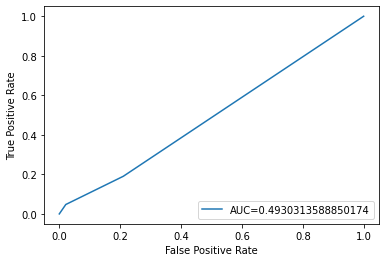

Logistic_Reg_Model


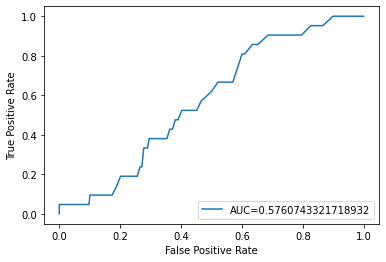

Naive_Bayes


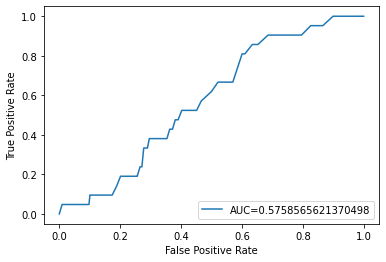

Random_forest


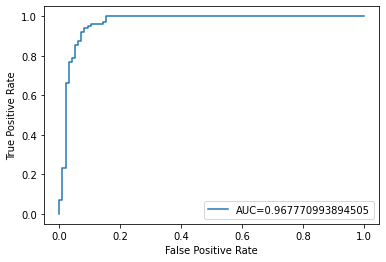

In [24]:
print("KNN_model")
KNN_model(3,X,y)
print("Logistic_Reg_Model")
Logistic_Reg_Model(X,y)
print("Naive_Bayes")
Naive_Bayes(X,y)
print("Random_forest")
Random_forest(X,y)

# Implementing  Feed Forward Neural Network

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 35)

model = keras.Sequential([
   keras.layers.Dense(15, input_shape=(15,)), #input layer
   keras.layers.Dense(9, activation='relu'), #hidden layer
   keras.layers.Dense(1, activation='sigmoid') #ouput layer
])

#or this will also work
# model = keras.Sequential([
#     keras.layers.Dense(32, input_shape=(32,), activation='relu'),
#     keras.layers.Dense(1, activation='sigmoid') #ouput layer
# ])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=15)

Epoch 1/15
39/39 [==============================] - 1s 2ms/step - loss: 0.8626 - accuracy: 0.9279
Epoch 2/15
39/39 [==============================] - 0s 2ms/step - loss: 0.3402 - accuracy: 0.9279
Epoch 3/15
39/39 [==============================] - 0s 2ms/step - loss: 0.2764 - accuracy: 0.9279
Epoch 4/15
39/39 [==============================] - 0s 2ms/step - loss: 0.2599 - accuracy: 0.9279
Epoch 5/15
39/39 [==============================] - 0s 2ms/step - loss: 0.2506 - accuracy: 0.9279
Epoch 6/15
39/39 [==============================] - 0s 2ms/step - loss: 0.2613 - accuracy: 0.9279
Epoch 7/15
39/39 [==============================] - 0s 2ms/step - loss: 0.2582 - accuracy: 0.9279
Epoch 8/15
39/39 [==============================] - 0s 2ms/step - loss: 0.2557 - accuracy: 0.9279
Epoch 9/15
39/39 [==============================] - 0s 2ms/step - loss: 0.2655 - accuracy: 0.9279
Epoch 10/15
39/39 [==============================] - 0s 2ms/step - loss: 0.2546 - accuracy: 0.9279
Epoch 11/15
39/39 [

In [26]:
X_train.shape

(1220, 15)

In [27]:
yp = model.predict(X_test)

17/17 [==============================] - 0s 2ms/step


In [28]:
y_pred = []
for element in yp:
    if element > 0.1:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [29]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.94      1.00      0.97       490
        True       0.00      0.00      0.00        33

    accuracy                           0.94       523
   macro avg       0.47      0.50      0.48       523
weighted avg       0.88      0.94      0.91       523



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Implementing node2vec

In [30]:
n2v = nx.from_pandas_edgelist(df_1, 'citing','cited')

In [ ]:
node2vec = Node2Vec(n2v, dimensions=120, walk_length=10, num_walks=80)

# train node2vec model
n2w_model = node2vec.fit(window=10, min_count=1)

Computing transition probabilities:   0%|          | 0/346091 [00:00<?, ?it/s]

In [ ]:
x = [(n2w_model[str(i)]+n2w_model[str(j)]) for i,j in zip(Feature_DF['Venue_citing'], Feature_DF['Venue_cited'])]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(np.array(x),Feature_DF['check'],test_size = 0.3,random_state = 35)
model = keras.Sequential([
   keras.layers.Dense(11, input_shape=(120,)), #input layer
   keras.layers.Dense(15, activation='relu'), #hidden layer
   keras.layers.Dense(1, activation='sigmoid') #ouput layer
])

#or this will also work
# model = keras.Sequential([
#     keras.layers.Dense(32, input_shape=(32,), activation='relu'),
#     keras.layers.Dense(1, activation='sigmoid') #ouput layer
# ])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50)


In [ ]:
yp = model.predict(X_test)

In [ ]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))